# Vis: Bar Charts

*Purpose*: *Bar charts* are a key tool for EDA. In this exercise, we'll learn how to construct a variety of different bar charts, as well as when---and when *not*---to use various charts.


## Setup


In [1]:
import grama as gr
DF = gr.Intention()
%matplotlib inline

We'll use the `mpg` dataset from `plotnine`: This is a dataset describing different automobiles, including their mileage (hence mpg).


In [2]:
from plotnine.data import mpg as df_mpg

# Bars and Cols

A bar chart visualizes data using bars. A bar chart is most effective at showing a continuous variable against a discrete one.

With ggplot we have two ways to make a bar chart: The first is `geom_bar()`, which takes just one aesthetic `x`. The geometry `geom_bar()` visualizes the number of observations (count) in the dataset associated with each unique value of the given variable. For instance, the following plot shows the number of vehicles according to each `class`.


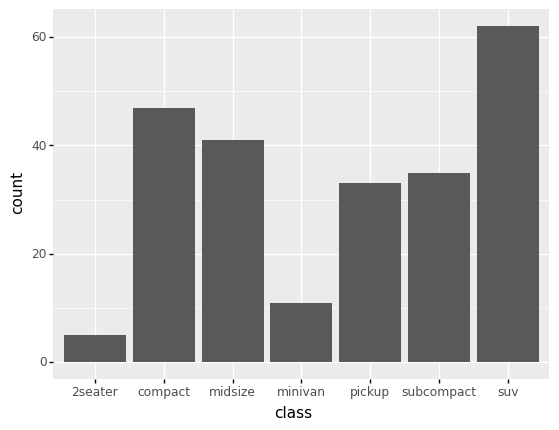

<ggplot: (8779991415598)>

In [3]:
# NOTE: No need to edit
(
    df_mpg
    >> gr.ggplot(mapping=gr.aes(x="class"))
    + gr.geom_bar()
)

Clearly, there are far more SUVs, compacts, and midsize vehicles in the dataset than other classes.

The other bar geometry is `geom_col()`, which takes two aesthetics. The geometry `geom_col()` extends from zero to a desired value `y`, within each `x` value. The following gives a simple demo with made-up data.


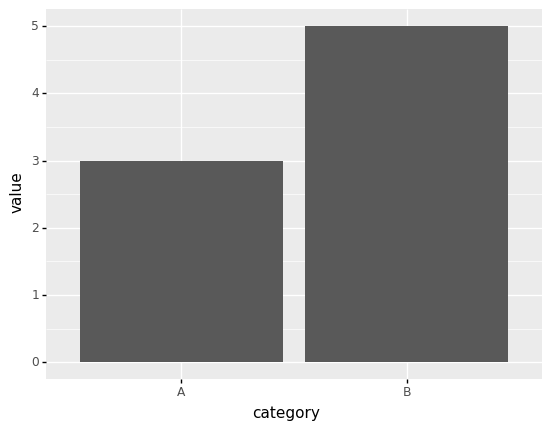

<ggplot: (8779991607101)>

In [4]:
# NOTE: No need to edit
(
    gr.df_make(
        category=["A", "B"],
        value=[3, 5],
    )
    >> gr.ggplot(gr.aes(x="category", y="value"))
    + gr.geom_col()
)


We can actually recreate a `geom_bar()` plot by using `tf_count()` and `geom_col()`, which you'll do in the next task.


### __q1__ Convert bars to cols

Recreate the following plot using `geom_col()`.


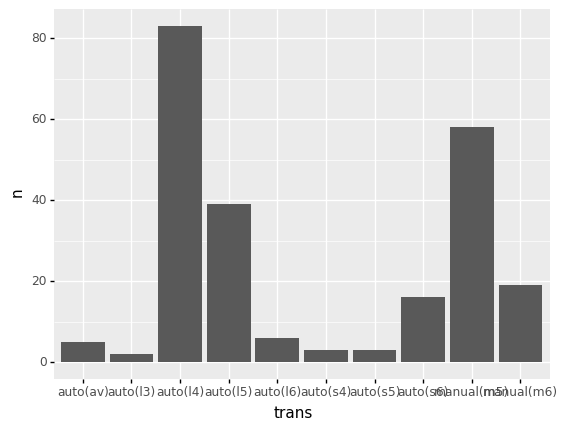

<ggplot: (8779991641597)>

In [5]:
# TASK: Convert this plot to use geom_cols()

(
    df_mpg
    >> gr.tf_count(DF.trans)
    >> gr.ggplot(gr.aes(x="trans", y="n"))
    + gr.geom_col()
)
# solution-end

Note that the labels for `trans` overlap; we'll fix that in the next section.

# Challenges with bar charts

There are a few "gotchas" when visualizing with bar charts; we'll go over two:


## Overlapping Labels

We saw in the previous plot that when our `x` variable has a lot of levels, the labels can overlap. One simple way to fix this is to flip the coordinates. We can't simply swap the aesthetics `x` and `y`, as this will not give us what we want:


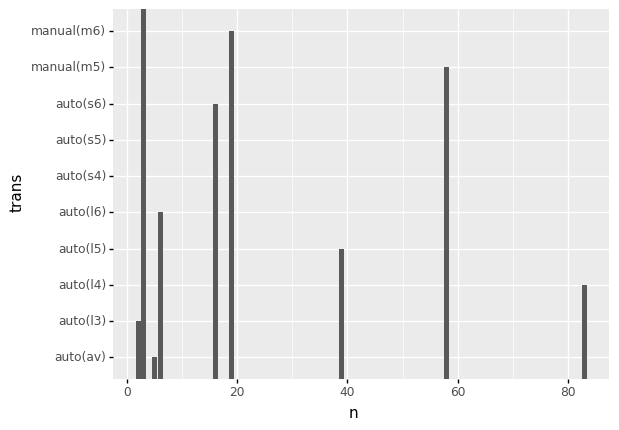

<ggplot: (8779991542541)>

In [6]:
# NOTE: No need to edit; run and inspet
(
    df_mpg
    >> gr.tf_count(DF.trans)
    >> gr.ggplot(gr.aes(y="trans", x="n"))
    + gr.geom_col()
)


Instead, we can *flip* the entire plot using `coord_flip()`. We use this by adding it to the `ggplot` object:

```python
(
    df_data
    >> gr.ggplot(gr.aes(x="x", y="y"))
    + gr.geom_col()
    + gr.coord_flip()
)
```

### __q2__ Flip coordinates to fix overlap

Flip the coordinates to fix the overlapping labels in the following plot.


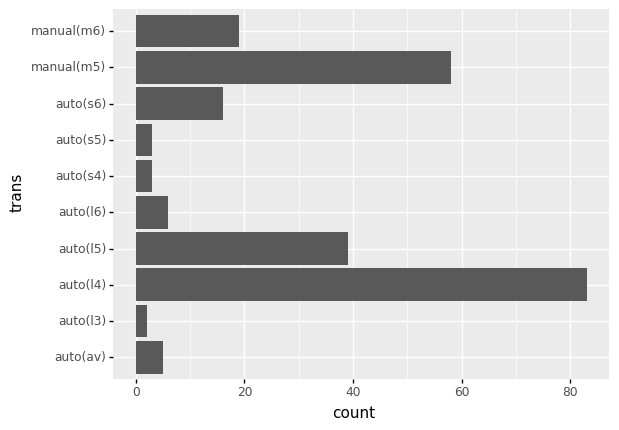

<ggplot: (8779953895057)>

In [7]:
# TASK: Flip the coordinates to fix the overlapping labels
(
    df_mpg
    >> gr.ggplot(gr.aes(x="trans"))
    + gr.geom_bar()
    + gr.coord_flip()
)

## 1-to-1 Data

A bar chart draws a bar for every observation, this means that the data need to be "1-to-1". This is an important limitation of bar charts, which is best understood through an example:


### __q3__ Inspect the plot

Inspect the following plot, and answer the questions under *observations* below.


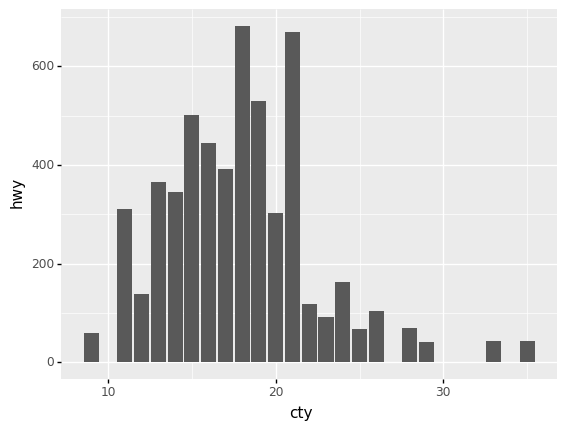

<ggplot: (8779971637158)>

In [8]:
# TASK: No need to edit; run and inspect
(
    df_mpg
    >> gr.ggplot(gr.aes(x="cty", y="hwy"))
    + gr.geom_col()
)


*Observations*

- What is the largest `hwy` value shown in the plot above? Does this seem like a realistic value for the highway mileage?
  - The largest `hwy` value is over 600; this is totally unreasonable!
<!-- solution-end -->

The following plot helps us understand the issue: With outlines around each bar, we can see that there are *multiple stacked bars* at each `x` level.


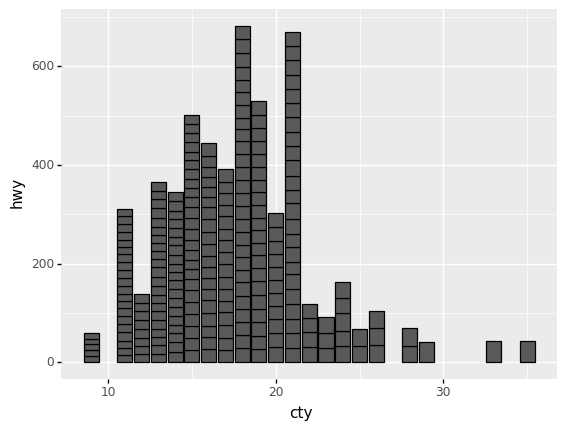

<ggplot: (8779954024795)>

In [9]:
# TASK: No need to edit; run and inspect
(
    df_mpg
    >> gr.ggplot(gr.aes(x="cty", y="hwy"))
    + gr.geom_col(color="black")
)


In order to avoid overlap, the data need to have just one observation for each level of the horizontal factor. Put differently, the data must be [1-to-1](https://en.wikipedia.org/wiki/Injective_function). We can check this with some simple counting.


### __q4__ Check if data are 1-to-1

If the data were 1-to-1 in the `cty` to `hwy` values, then there would be only one `hwy` value for each unique `cty` value. Check whether this is the case in `df_mpg`.


In [10]:
# TASK: Check if the data are 1-to-1 (in cty and hwy)
(
    df_mpg
    >> gr.tf_count(DF.cty, DF.hwy)
    >> gr.tf_head()
)

,cty,hwy,n
0,9,12,5
1,11,14,2
2,11,15,10
3,11,16,3
4,11,17,5


*Observations*

- Is the data 1-to-1? Why or why not?
  - No, the data are not 1-to-1: For instance, for the value `cty==11`, `hwy` takes multiple different values.
<!-- solution-end -->

# Design Considerations

To close this exercise, we'll cover some design considerations when making (bar) charts.


## Picking aesthetics

A major part of designing any plot is making choices about assigning variables to aesthetics.

One option we have is to "double-assign" a variable to multiple aesthetics. In the next task you'll compare the efficacy of double-assigning aesthetics.


### __q5__ Compare two plots

Compare the following two plots, and answer the questions under *observations* below.


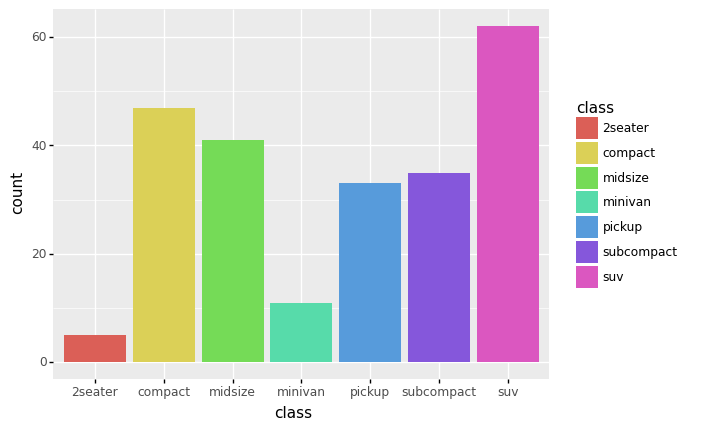

<ggplot: (8779971572502)>

In [11]:
# TASK: No need to edit; run and inspect
(
    df_mpg
    >> gr.ggplot(gr.aes(x="class", fill="class"))
    + gr.geom_bar()
)

*Observations*

- What observations can you make?
  - The `suv` observations are most numerous
  - There are fewest `2seater` observations


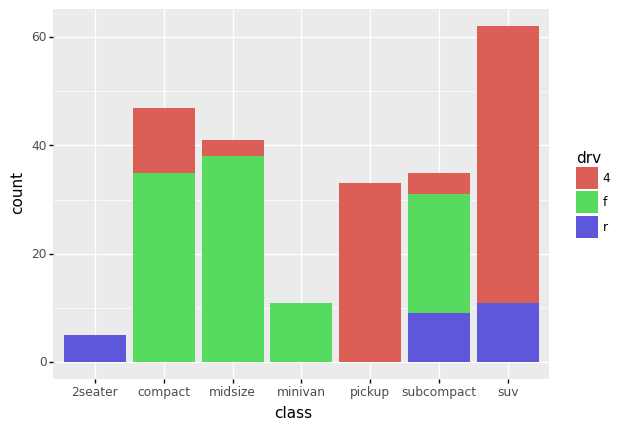

<ggplot: (8779971790279)>

In [12]:
# TASK: No need to edit; run and inspect
(
    df_mpg
    >> gr.ggplot(gr.aes(x="class", fill="drv"))
    + gr.geom_bar()
)

*Observations*

- What **additional** observations can you make on this version of the plot?
  - Rear-wheel drive vehicles in the dataset are only `2seater`, `subcompact`, and `suv`.
  - All the `2seater` vehicles are rear-wheel drive.
  - All the `minivan` vehicles are forward-wheel drive.
- What is different in the design of this graph, as compared with the previous one?
  - This version of the graph uses `fill` for an additional variable `drv`, rather than repeating the `x` aesthetic `class`.


### __q6__ Pros and cons of double-assignment

Answer the questions below:

- What are some pros of double-assigning a single variable to multiple aesthetics?
  - Double-assigning a variable can more highly-emphasize a variable.
- What are some pros of single-assigning aesthetics, in order to show more variables?
  - Showing more variables opens up the possibility of seeing more patterns.
